<a href="https://colab.research.google.com/github/kruber312/ProyectoDataScience/blob/main/PreEntrega%2BHernan_Garcia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importaciones


In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Objetivos

Este analisis puede ser util para personas que esten buscando mudarse o tengan un interes general sobre el area en cuestion. Intentaremos decifrar los patrones climaticos de la ciudad de Nueva York, y compararlos con otra zona, en este caso Florida.

 Nos concentraremos en responder las siguientes preguntas:

- Como son las condiciones climaticas Nueva York?
- Cuáles son los períodos del año con temperaturas agradables y condiciones climáticas ideales para actividades al aire libre?
- Existe riesgo de condiciones climaticas excepcionales?
- Hay alguna relacion entre las variables? Que nos permita averiguar por ejemplo la temperatura a partir de otras variables?
- Es mejor vivir en New York o en Florida segun las condiciones climaticas?


# Carga de Datos del CSV (Codigo Postal 10001)

In [102]:
nombre_archivo = '/content/drive/MyDrive/Dscience/weather.csv'

# Carga el archivo CSV en un DataFrame
final_df = pd.read_csv(nombre_archivo)
final_df.shape

(29242, 22)

In [8]:
final_df.describe()

,wdir,temp,maxt,visibility,wspd,solarenergy,heatindex,cloudcover,mint,datetime,precip,solarradiation,snowdepth,sealevelpressure,snow,dew,humidity,wgust,windchill
count,29179.000000,29242.000000,29242.000000,29242.000000,29242.000000,18478.000000,3901.000000,29242.000000,29242.000000,2.924200e+04,29242.000000,18478.000000,25292.000000,29242.000000,25279.000000,29242.000000,29242.000000,11691.000000,9336.000000
mean,195.361870,14.767995,14.767995,14.558163,10.980593,1.253307,30.388336,44.897996,14.767995,1.549065e+12,0.135740,348.088592,0.605182,1017.068696,0.007051,5.654429,57.430179,36.852006,0.277421
std,117.377117,9.955415,9.955415,3.306333,6.450028,0.995755,2.779591,42.006933,9.955415,7.287753e+10,0.958321,276.422955,3.029272,7.912075,0.114224,10.722382,19.362051,9.249992,5.817256
min,0.000000,-18.100000,-18.100000,0.000000,0.000000,0.000000,25.900000,0.000000,-18.100000,1.422691e+12,0.000000,1.000000,0.000000,975.300000,0.000000,-27.900000,8.230000,22.300000,-28.600000
25%,62.000000,6.800000,6.800000,15.800000,6.800000,0.400000,28.300000,4.700000,6.800000,1.485782e+12,0.000000,101.250000,0.000000,1012.100000,0.000000,-2.700000,42.542500,30.100000,-3.000000
50%,231.000000,15.000000,15.000000,16.000000,10.300000,1.000000,29.800000,29.300000,15.000000,1.548895e+12,0.000000,287.000000,0.000000,1016.900000,0.000000,6.700000,55.145000,34.700000,1.300000
75%,298.000000,23.300000,23.300000,16.000000,14.700000,2.000000,32.000000,96.200000,23.300000,1.612011e+12,0.000000,556.000000,0.000000,1022.200000,0.000000,14.700000,71.850000,40.700000,4.800000
max,360.000000,35.900000,35.900000,16.000000,46.200000,3.900000,43.500000,100.000000,35.900000,1.675098e+12,38.410000,1090.000000,39.140000,1044.000000,10.620000,25.600000,99.670000,109.400000,9.700000


# Descripcion de Columnas

- `wdir`: Dirección del viento.
- `temp`: Temperatura actual.
- `maxt`: Temperatura máxima.
- `visibility`: Visibilidad.
- `wspd`: Velocidad del viento.
- `datetimeStr`: Fecha y hora en formato de cadena.
- `solarenergy`: Energía solar.
- `heatindex`: Índice de calor.
- `cloudcover`: Cobertura de nubes.
- `mint`: Temperatura mínima.
- `datetime`: Fecha y hora en formato datetime.
- `precip`: Precipitación.
- `solarradiation`: Radiación solar.
- `weathertype`: Tipo de clima.
- `snowdepth`: Profundidad de nieve.
- `sealevelpressure`: Presión a nivel del mar.
- `snow`: Nieve.
- `dew`: Punto de rocío.
- `humidity`: Humedad.
- `precipcover`: Cobertura de precipitación.
- `wgust`: Ráfaga de viento.
- `conditions`: Condiciones climáticas.
- `windchill`: Sensación térmica por el viento.
- `info`: Información adicional.



# Duplicados y Nulos..

## Duplicados

Vemos duplicados en el campo de las datetimeStr.

In [9]:
# Verificar duplicados en la columna datetimeStr
duplicates_mask = final_df['datetimeStr'].duplicated()
duplicated_rows = final_df[duplicates_mask]
print(duplicated_rows)

Empty DataFrame
Columns: [wdir, temp, maxt, visibility, wspd, datetimeStr, solarenergy, heatindex, cloudcover, mint, datetime, precip, solarradiation, weathertype, snowdepth, sealevelpressure, snow, dew, humidity, wgust, conditions, windchill]
Index: []

[0 rows x 22 columns]


In [10]:
# Son pocas filas duplicadas..Vamos a dropearlas.
final_df = final_df.drop_duplicates(subset='datetimeStr')

## Nulos

In [11]:
# Verificar valores nulos en todo el DataFrame
null_values = final_df.isnull().any()
print("\nValores nulos en el DataFrame:")
print(null_values)


Valores nulos en el DataFrame:
wdir                 True
temp                False
maxt                False
visibility          False
wspd                False
datetimeStr         False
solarenergy          True
heatindex            True
cloudcover          False
mint                False
datetime            False
precip              False
solarradiation       True
weathertype          True
snowdepth            True
sealevelpressure    False
snow                 True
dew                 False
humidity            False
wgust                True
conditions          False
windchill            True
dtype: bool


In [12]:
# Verifico la cantidad de nulos
null_percentage = (final_df.isnull().mean() * 100).round(2)
null_percentage

wdir                 0.22
temp                 0.00
maxt                 0.00
visibility           0.00
wspd                 0.00
datetimeStr          0.00
solarenergy         36.81
heatindex           86.66
cloudcover           0.00
mint                 0.00
datetime             0.00
precip               0.00
solarradiation      36.81
weathertype         84.61
snowdepth           13.51
sealevelpressure     0.00
snow                13.55
dew                  0.00
humidity             0.00
wgust               60.02
conditions           0.00
windchill           68.07
dtype: float64

Las columnas info,precipcover no tienen valores. Vamos a dropear esas columnas..

Las demas que tienen valores nulos vamos a utilizar la lectura anterior.

In [13]:
# Llenamos los datos nulos de las otras columnas con la medida anterior...
filled_df = final_df.fillna(method= 'ffill')
# Verifico la cantidad de nulos en este momento
null_percentage = (filled_df.isnull().mean() * 100).round(2)
null_percentage

wdir                 0.00
temp                 0.00
maxt                 0.00
visibility           0.00
wspd                 0.00
datetimeStr          0.00
solarenergy         36.48
heatindex            3.10
cloudcover           0.00
mint                 0.00
datetime             0.00
precip               0.00
solarradiation      36.48
weathertype          0.07
snowdepth            0.00
sealevelpressure     0.00
snow                 0.00
dew                  0.00
humidity             0.00
wgust                0.00
conditions           0.00
windchill            0.00
dtype: float64

Solarenergy y Solaradiation no se llenaron, posiblemente porque no hay valores cercanos. Voy a investigar

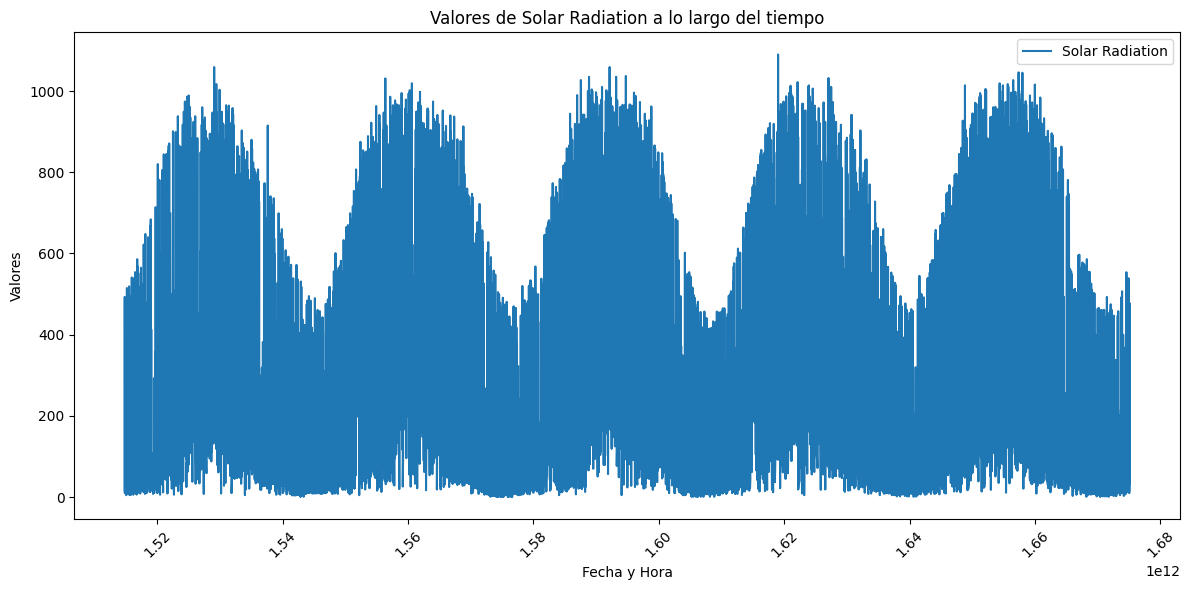

In [14]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
plt.figure(figsize=(12, 6))

# Graficar los valores a lo largo del 'datetime'
plt.plot(final_df['datetime'], final_df['solarradiation'], label='Solar Radiation')

# Agregar etiquetas y título
plt.xlabel('Fecha y Hora')
plt.ylabel('Valores')
plt.title('Valores de Solar Radiation a lo largo del tiempo')
plt.legend()

# Rotar las etiquetas del eje x para mayor claridad
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


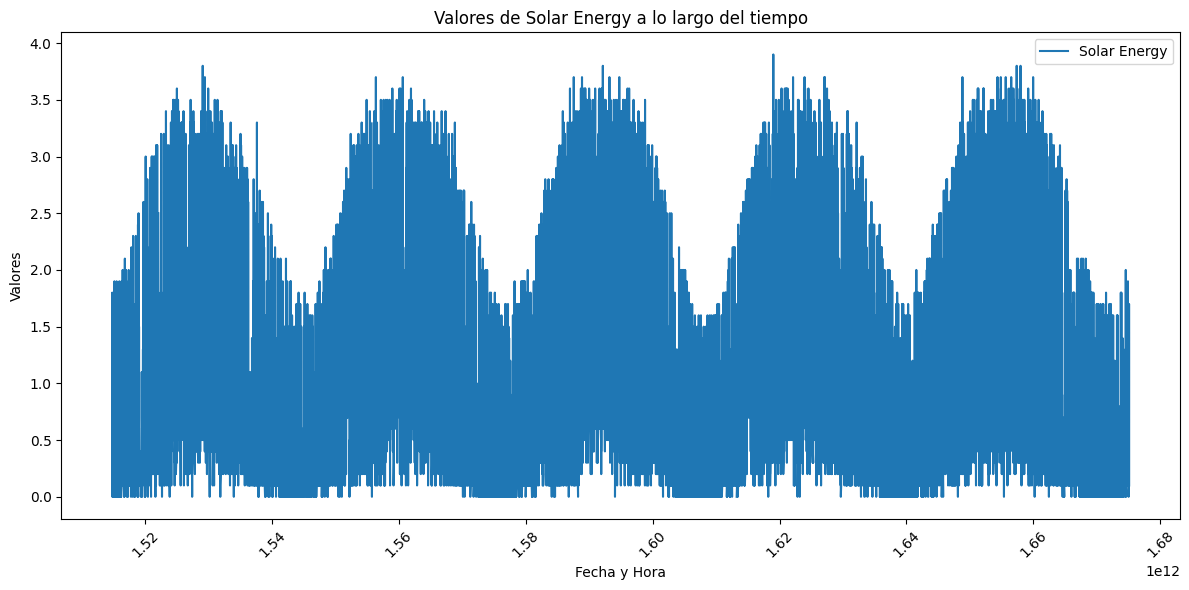

In [15]:
# Crear una figura y ejes
plt.figure(figsize=(12, 6))

# Graficar los valores a lo largo del 'datetime'
plt.plot(final_df['datetime'], final_df['solarenergy'], label='Solar Energy')

# Agregar etiquetas y título
plt.xlabel('Fecha y Hora')
plt.ylabel('Valores')
plt.title('Valores de Solar Energy a lo largo del tiempo')
plt.legend()

# Rotar las etiquetas del eje x para mayor claridad
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Estos valores parecen variar de a poco a largo del tiempo, voy a intentar llenarlos con los valores mas cercanos hacia adelante

In [16]:
filled_df['solarenergy'] = filled_df['solarenergy'].fillna(method='bfill')
filled_df['solarradiation'] = filled_df['solarradiation'].fillna(method='bfill')
null_percentage = (filled_df.isnull().mean() * 100).round(2)
null_percentage

wdir                0.00
temp                0.00
maxt                0.00
visibility          0.00
wspd                0.00
datetimeStr         0.00
solarenergy         0.00
heatindex           3.10
cloudcover          0.00
mint                0.00
datetime            0.00
precip              0.00
solarradiation      0.00
weathertype         0.07
snowdepth           0.00
sealevelpressure    0.00
snow                0.00
dew                 0.00
humidity            0.00
wgust               0.00
conditions          0.00
windchill           0.00
dtype: float64

HeatIndex aun tiene valores vacios.., pero son solo el 3% asi que hago lo mismo..

In [17]:
filled_df['heatindex'] = filled_df['heatindex'].fillna(method='bfill')
null_percentage = (filled_df.isnull().mean() * 100).round(2)
null_percentage

wdir                0.00
temp                0.00
maxt                0.00
visibility          0.00
wspd                0.00
datetimeStr         0.00
solarenergy         0.00
heatindex           0.00
cloudcover          0.00
mint                0.00
datetime            0.00
precip              0.00
solarradiation      0.00
weathertype         0.07
snowdepth           0.00
sealevelpressure    0.00
snow                0.00
dew                 0.00
humidity            0.00
wgust               0.00
conditions          0.00
windchill           0.00
dtype: float64

Y no tenemos mas nulos!

In [18]:
# Guardo esta etapa
nonull_df = filled_df

# Analisis Exploratorio de Datos (EDA)


Comenzaremos analisando algunas de las variables de nuestros datos. En primer lugar la temperatura. (Univariado)

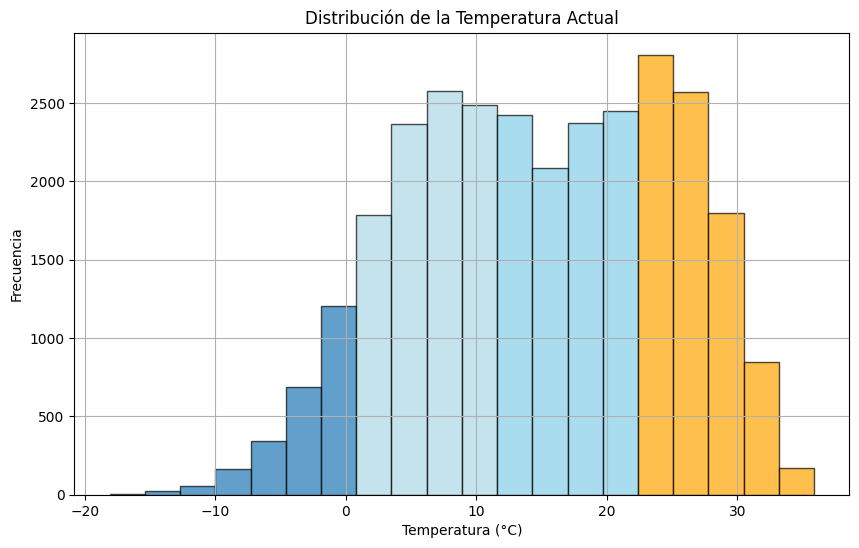

In [19]:
plt.figure(figsize=(10, 6))
hist = plt.hist(filled_df['temp'], bins=20, edgecolor='black', alpha=0.7)
#cambiamos el color segun la temperatura.
for i in range(len(hist[0])):
    if hist[1][i] >= 0 and hist[1][i] < 10:
        plt.gca().patches[i].set_facecolor('lightblue')
    elif hist[1][i] >= 10 and hist[1][i] < 20:
        plt.gca().patches[i].set_facecolor('skyblue')
    elif hist[1][i] >= 20 and hist[1][i] <= 50:
        plt.gca().patches[i].set_facecolor('orange')

plt.title('Distribución de la Temperatura Actual')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [20]:
# Calcular la media y la desviación estándar de la temperatura
mean_temp = np.mean(filled_df['temp'])
std_temp = np.std(filled_df['temp'])

print(f"Media de la temperatura actual: {mean_temp:.2f} °C")
print(f"Desviación estándar de la temperatura actual: {std_temp:.2f} °C")

Media de la temperatura actual: 14.77 °C
Desviación estándar de la temperatura actual: 9.96 °C


Podemos ver que hay bastante desviacion entre la temperatura maxima y minima. Por lo que en este lugar tendremos que investigar si se encuentra muy afectado por estaciones u otras condiciones climaticas. Ahora continuaremos explorando la velocidad del viento..

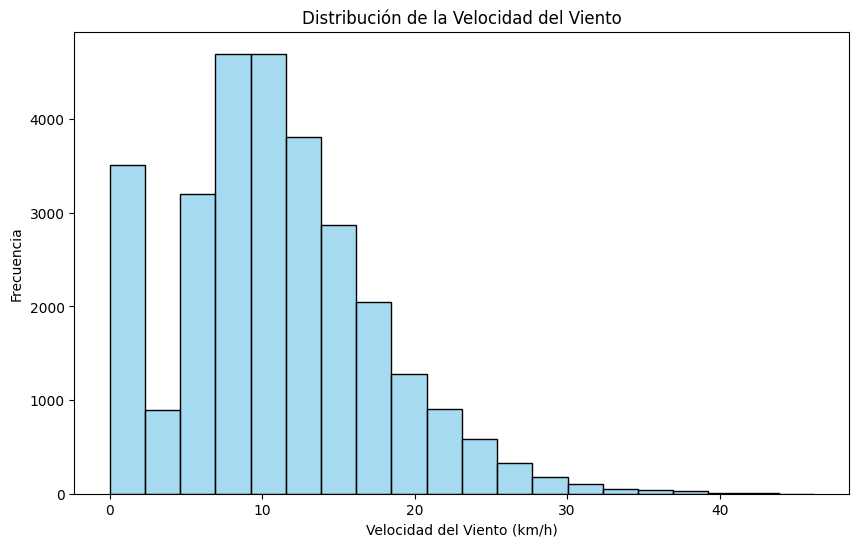

In [21]:
# Crear un histograma de la velocidad del viento
plt.figure(figsize=(10, 6))
sns.histplot(data=filled_df, x='wspd', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de la Velocidad del Viento')
plt.xlabel('Velocidad del Viento (km/h)')
plt.ylabel('Frecuencia')
plt.show()

Podemos observar que no hay vientos muy fuertes. Segun una busqueda de Google que acabo de realizar, para que se considere viento Moderado debe superar 20km/h por lo que esta Zona no parece ser afectada por vientos fuertes. Ahora exploraremos las precipitaciones.

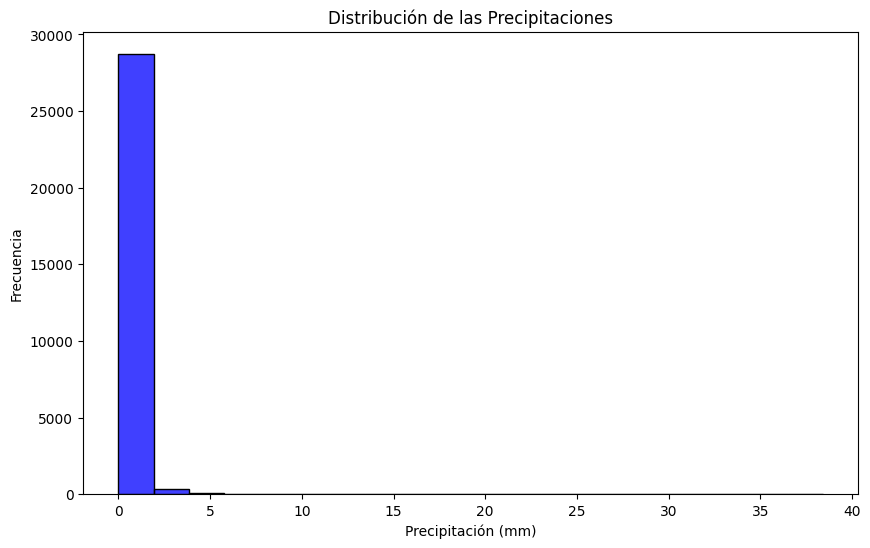

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=filled_df, x='precip', bins=20, color='blue', edgecolor='black')
plt.title('Distribución de las Precipitaciones')
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia')
plt.show()

Parece que en este lugar, si llueve, no llueve mucho. (En el futuro voy a cambiar la API para que traiga datos de un lugar mas interesante).

Ahora exploraremos las temperaturas a lo largo del tiempo.

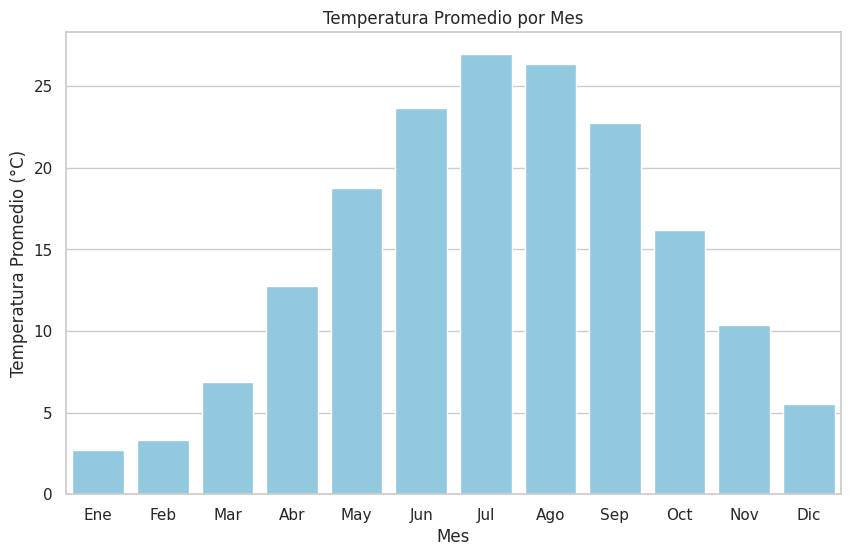

In [48]:
# Filtrar el DataFrame para quedarse solo con la temperatura y el mes
filled_df['datetime'] = pd.to_datetime(filled_df['datetimeStr'], utc=True)
filled_df['month'] = filled_df['datetime'].dt.month
temperature_by_month = filled_df.groupby('month')['temp'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=temperature_by_month.index, y=temperature_by_month.values, color='skyblue')
plt.title('Temperatura Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('Temperatura Promedio (°C)')
plt.xticks(range(0, 12), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

Podemos ver que las temperaturas mas agradables se dan cuanto mas cerca estamos de los meses de Julio. Ahora veamos lo mismo, pero incluyamos tambien la velocidad del viento y las precipitaciones


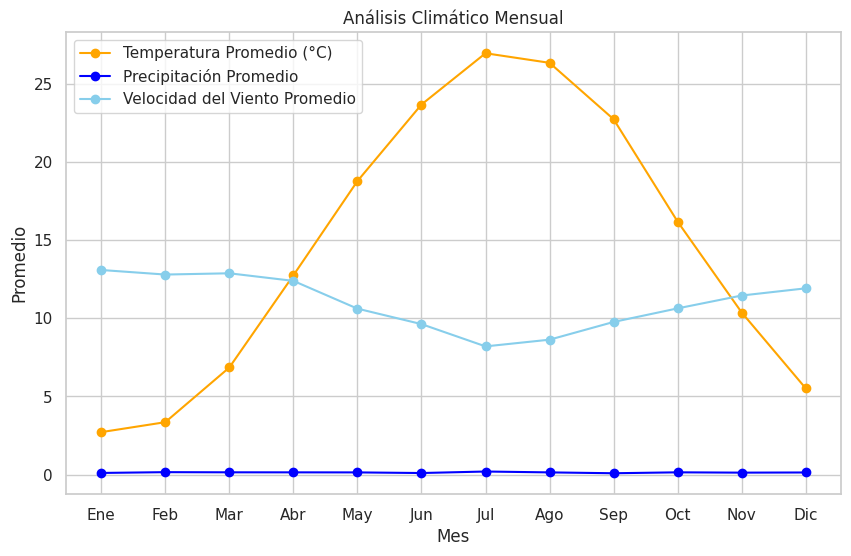

In [24]:
# Filtrar el DataFrame para quedarse solo con la temperatura, precipitaciones y velocidad del viento
filled_df['month'] = filled_df['datetime'].dt.month
data_by_month = filled_df.groupby('month')[['temp', 'precip', 'wspd']].mean()

# Configurar estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(data_by_month.index, data_by_month['temp'], marker='o', color='orange', label='Temperatura Promedio (°C)')
plt.plot(data_by_month.index, data_by_month['precip'], marker='o', color='blue', label='Precipitación Promedio')
plt.plot(data_by_month.index, data_by_month['wspd'], marker='o', color='skyblue', label='Velocidad del Viento Promedio')
plt.title('Análisis Climático Mensual')
plt.xlabel('Mes')
plt.ylabel('Promedio')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend()
plt.show()

Asi confirmamos que cuanto mas nos acerquemos a junio son mejores las condiciones climaticas para disfrutar al aire libre. Pero, hay riesgo de que nos podamos encontrar con alguna sorpresa climatica al salir de nuestro hogar? Para haremos un estudio de los outliers de nuestros datos.

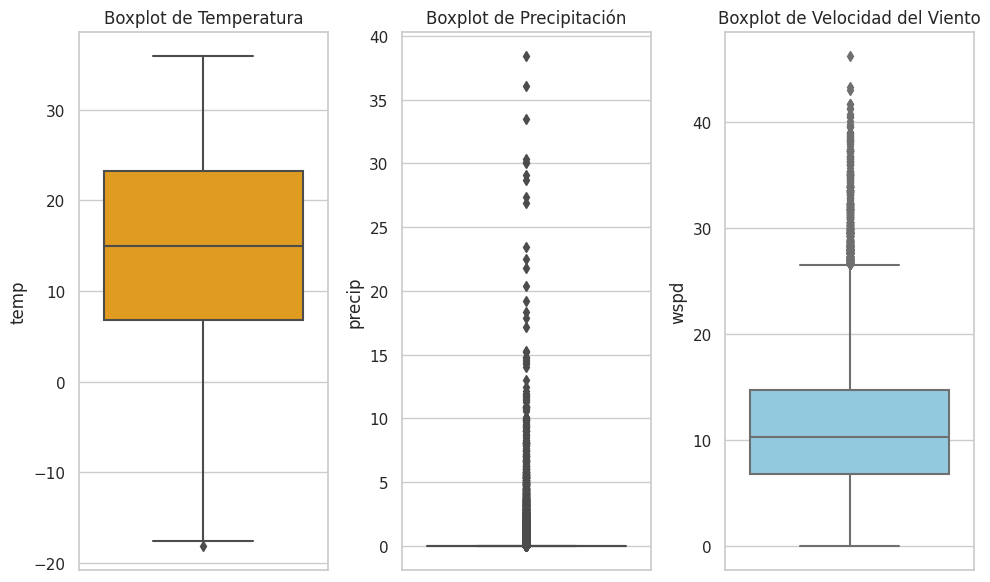

In [25]:
# Crear los boxplots
plt.figure(figsize=(10, 6))

# Boxplot de temperatura
plt.subplot(1, 3, 1)
sns.boxplot(y=filled_df['temp'], color='orange')
plt.title('Boxplot de Temperatura')

# Boxplot de precipitación
plt.subplot(1, 3, 2)
sns.boxplot(y=filled_df['precip'], color='blue')
plt.title('Boxplot de Precipitación')

# Boxplot de velocidad del viento
plt.subplot(1, 3, 3)
sns.boxplot(y=filled_df['wspd'], color='skyblue')
plt.title('Boxplot de Velocidad del Viento')

plt.tight_layout()
plt.show()


Si bien podemos salir con bastante seguridad de que la temperatura es la esperada. Podemos ver que hay bastantes lecturas de lluvias y velocidades de viento por encima de lo esperado. Por lo que es posible que nos encontremos con un clima inesperado. Despues de todo la prediccion de el clima no es una ciencia exacta!

Ahora vamos a ver si podemos encontrar alguna relacion entre las variables, para estudiar si correlaciones fuertes. (Bivariado)

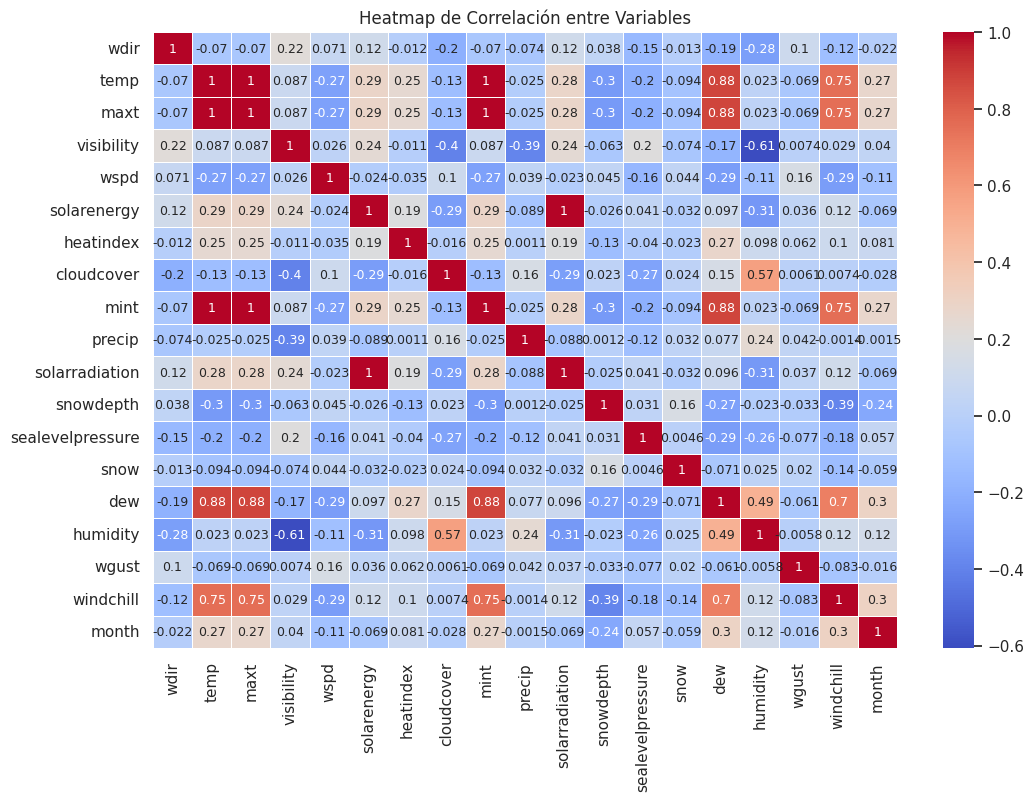

In [26]:
# Calcular la matriz de correlación
correlation_matrix = filled_df.corr(numeric_only=True)

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 9})
plt.title('Heatmap de Correlación entre Variables')
plt.show()


Podemos observar varias relaciones muy fuertes, en el caso de la temperatura, con la maxima y la minima, aunque nada sorprendente, estan fuertemente relacionadas. Tambien entre la Radiacion Solar y la Energia Solar tiene una relacion absoluta. (Lo mas probable es que sean calculadas una a partir de la otra).

Tambien podemos ver el Rocio, que tiene relaciones fuerte con las temperaturas. Asi tambien Windchill(Escalofrio) tiene tambien relacion decente con la temperatura y el Rocio.

Tenemos tambien relaciones negativas, en el caso de la visibilidad con una relacion inversa a la humedad. Continuaremos explorando estas dos.



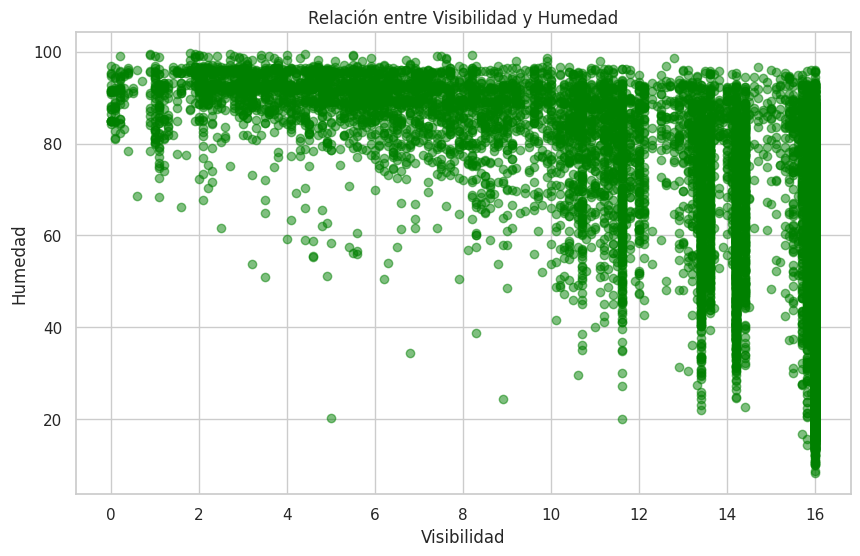

Correlación entre Visibilidad y Humedad: -0.61


In [27]:
# Crear un gráfico de dispersión entre visibility y humidity
plt.figure(figsize=(10, 6))
plt.scatter(filled_df['visibility'], filled_df['humidity'], alpha=0.5, color='green')
plt.title('Relación entre Visibilidad y Humedad')
plt.xlabel('Visibilidad')
plt.ylabel('Humedad')
plt.grid(True)
plt.show()

# Calcular la correlación entre visibility y humidity
correlation = filled_df['visibility'].corr(filled_df['humidity'])
print(f"Correlación entre Visibilidad y Humedad: {correlation:.2f}")


Aqui podemos ver la correlacion en un scatterplot. Se puede notar que si existe una relacion entre ambas. A lo que mas Humedad, menos visibilidad tenemos en promedio.

Y para agregar un poco a este trabajo tambien veremos la relacion entre el Rocio y la sensacion termica..

<Figure size 1000x600 with 0 Axes>

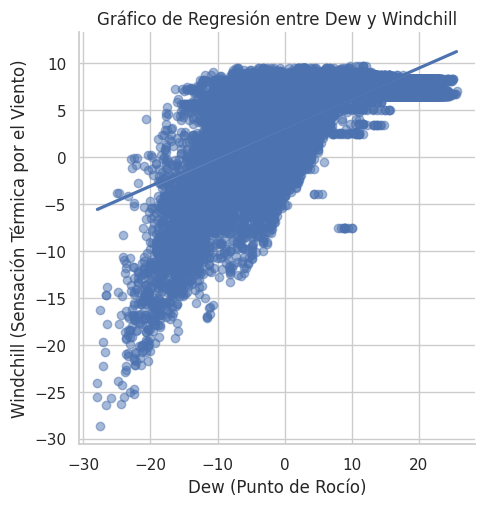

In [28]:
# Crear un gráfico de regresión entre dew y windchill
plt.figure(figsize=(10, 6))
sns.lmplot(x='dew', y='windchill', data=filled_df, scatter_kws={'alpha':0.5})
plt.title('Gráfico de Regresión entre Dew y Windchill')
plt.xlabel('Dew (Punto de Rocío)')
plt.ylabel('Windchill (Sensación Térmica por el Viento)')
plt.grid(True)
plt.show()


Si bien no es perfecta, podemos ver una relacion muy fuerte entre el Rocio y la Sensacion Termica.

# Comparando con otros lugares..

 Ahora, obtendremos datos de la misma API, pero para obtener datos de Florida.


## Carga de datos y preparacion del nuevo DF

In [82]:
url = "https://visual-crossing-weather.p.rapidapi.com/history"
headers = {
    "X-RapidAPI-Key": "ab258ed892msh375ad623e8a34a7p146f87jsn2fd7b4ccdc03",
    "X-RapidAPI-Host": "visual-crossing-weather.p.rapidapi.com"
}

# Definir fechas de inicio y fin para cada mes
start_date = pd.to_datetime("2015-01-01")
end_date = pd.to_datetime("2022-12-31")
months = pd.date_range(start_date, end_date, freq='M')

# Crear una lista para almacenar los DataFrames de cada mes
dfs = []

# Bucle para cada mes
for month in months:
    start_date_str = month.strftime('%Y-%m-%d')
    end_date_str = (month + pd.DateOffset(days=30)).strftime('%Y-%m-%d')

    querystring = {
        "startDateTime": start_date_str + "T00:00:00",
        "aggregateHours": "1",
        "location": "Florida",
        "endDateTime": end_date_str + "T00:00:00",
        "unitGroup": "metric",
        "dayStartTime": "8:00:00",
        "contentType": "json",
        "dayEndTime": "17:00:00",
        "shortColumnNames": "0"
    }

    response = requests.get(url, headers=headers, params=querystring)
    data = response.json()

    # Crear un DataFrame a partir de los datos de la respuesta
    df = pd.DataFrame(data['locations']['Florida']['values'])

    # Agregar el DataFrame actual a la lista
    dfs.append(df)

# Concatenar los DataFrames de cada mes en uno solo
florida_df = pd.concat(dfs, ignore_index=True)


In [83]:
#guardamos el DF para futuro uso..(la api es limitada)
ruta_del_archivo = '/content/drive/MyDrive/Dscience/florida_weather.csv'
florida_df.to_csv(ruta_del_archivo, index=False)

In [84]:
florida_df.describe()

,wdir,temp,maxt,visibility,wspd,cloudcover,mint,datetime,precip,sealevelpressure,dew,humidity,wgust
count,29711.000000,29756.000000,29756.000000,29756.000000,29756.000000,29754.000000,29756.000000,2.976000e+04,29760.000000,29756.000000,29754.000000,29760.000000,7988.000000
mean,166.970011,23.120924,23.120924,15.237058,11.787045,60.677213,23.120924,1.548997e+12,0.191860,1018.286372,15.254883,64.827971,31.224837
std,117.767985,7.356704,7.356704,2.743870,7.147996,32.650710,7.356704,7.288205e+10,1.557875,4.787457,8.289093,20.878380,9.748972
min,0.000000,-7.100000,-7.100000,0.000000,0.000000,0.000000,-7.100000,1.422691e+12,0.000000,989.900000,-17.600000,10.210000,1.800000
25%,64.000000,18.500000,18.500000,16.000000,7.400000,28.325000,18.500000,1.485836e+12,0.000000,1015.300000,10.100000,49.017500,25.300000
50%,157.000000,24.300000,24.300000,16.000000,11.200000,69.800000,24.300000,1.548895e+12,0.000000,1018.100000,17.800000,64.920000,29.500000
75%,280.000000,28.700000,28.700000,16.000000,16.200000,88.500000,28.700000,1.612040e+12,0.000000,1021.200000,22.000000,82.860000,35.300000
max,360.000000,38.900000,38.900000,16.000000,66.900000,100.000000,38.900000,1.675098e+12,86.090000,1039.700000,27.200000,100.000000,196.600000


Ahora, vamos a añadir los datos de este nuevo lugar. Primero vamos a hacer que en nuestro DF original utilize la fecha de la medida como Key

In [44]:
#Copiamos el DF original por las dudas...
combined_df = filled_df.copy()
#Ponemos Datetime como Llave
combined_df = combined_df.set_index('datetime')
combined_df.index.dtype

datetime64[ns, UTC]

Vamos tambien para evitar confusion a agregar ny al principio de cada columna que ya tenemos..

In [45]:
# Agregar "ny" al principio de cada nombre de columna
combined_df = combined_df.add_prefix('ny_')
combined_df.columns

Index(['ny_wdir', 'ny_temp', 'ny_maxt', 'ny_visibility', 'ny_wspd',
       'ny_datetimeStr', 'ny_solarenergy', 'ny_heatindex', 'ny_cloudcover',
       'ny_mint', 'ny_precip', 'ny_solarradiation', 'ny_weathertype',
       'ny_snowdepth', 'ny_sealevelpressure', 'ny_snow', 'ny_dew',
       'ny_humidity', 'ny_wgust', 'ny_conditions', 'ny_windchill', 'ny_month'],
      dtype='object')

Ahora añadiremos el dataframe de Florida. Primero lo preparamos..

In [85]:
florida_df['datetime'] = pd.to_datetime(florida_df['datetimeStr'], utc=True)
florida_df = florida_df.set_index('datetime')
florida_df = florida_df.add_prefix('fl_')
florida_df.columns

Index(['fl_wdir', 'fl_temp', 'fl_maxt', 'fl_visibility', 'fl_wspd',
       'fl_datetimeStr', 'fl_solarenergy', 'fl_heatindex', 'fl_cloudcover',
       'fl_mint', 'fl_precip', 'fl_solarradiation', 'fl_weathertype',
       'fl_snowdepth', 'fl_sealevelpressure', 'fl_snow', 'fl_dew',
       'fl_humidity', 'fl_precipcover', 'fl_wgust', 'fl_conditions',
       'fl_windchill', 'fl_info'],
      dtype='object')

In [101]:
florida_df.shape

(29760, 23)

Realizamos el Merge...

In [92]:
# Realiza una fusión (merge) basada en la columna 'datetime'
combined_df = combined_df.merge(florida_df[['fl_temp', 'fl_precip', 'fl_wspd']], on='datetime', how='left')

In [93]:
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ny_wdir,32868.0,194.368687,117.499115,0.00,61.0000,230.00,298.00,360.00
ny_temp,32868.0,14.494469,9.917984,-18.10,6.6000,14.50,22.90,35.90
ny_maxt,32868.0,14.494469,9.917984,-18.10,6.6000,14.50,22.90,35.90
ny_visibility,32868.0,14.534176,3.357772,0.00,15.8000,16.00,16.00,16.00
ny_wspd,32868.0,11.131261,6.469277,0.00,6.9000,10.50,14.80,46.20
ny_solarenergy,32868.0,0.828271,0.965357,0.00,0.1000,0.30,1.40,3.90
ny_heatindex,32868.0,28.884380,1.971325,25.90,27.4000,28.90,30.00,43.50
ny_cloudcover,32868.0,45.551555,42.183689,0.00,4.7000,30.40,97.10,100.00
ny_mint,32868.0,14.494469,9.917984,-18.10,6.6000,14.50,22.90,35.90
ny_precip,32868.0,0.146198,1.022272,0.00,0.0000,0.00,0.00,38.41


## Comparacion de NY con Florida...

In [ ]:
# Aqui arreglamos un error anterior de nombrar month como si fuera solo de NY, podria haberlo dejado asi.
combined_df['month'] = combined_df['ny_month']

Comparamos temperaturas.

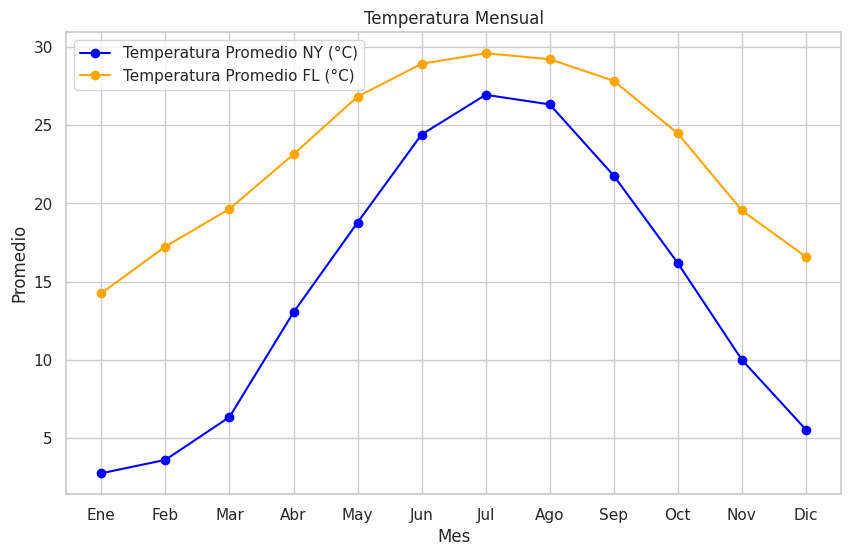

In [100]:
# Filtrar el DataFrame para quedarse solo con la temperatura, precipitaciones y velocidad del viento
data_by_month = combined_df.groupby('month')[['ny_temp','fl_temp']].mean()

# Configurar estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(data_by_month.index, data_by_month['ny_temp'], marker='o', color='blue', label='Temperatura Promedio NY (°C)')
plt.plot(data_by_month.index, data_by_month['fl_temp'], marker='o', color='orange', label='Temperatura Promedio FL (°C)')
plt.title('Temperatura Mensual')
plt.xlabel('Mes')
plt.ylabel('Promedio')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend()
plt.show()


Podemos ver que en Florida tiende a tener mayor temperatura a lo largo de todo el año, por lo que debe ser mas agradable..

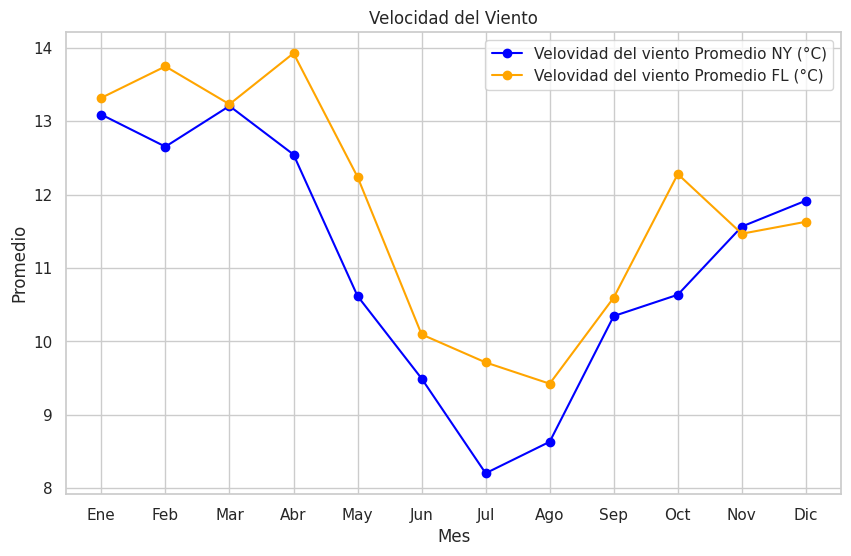

In [97]:
# Filtrar el DataFrame para quedarse solo con la temperatura, precipitaciones y velocidad del viento
data_by_month = combined_df.groupby('month')[['ny_wspd','fl_wspd']].mean()

# Configurar estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(data_by_month.index, data_by_month['ny_wspd'], marker='o', color='blue', label='Velovidad del viento Promedio NY (°C)')
plt.plot(data_by_month.index, data_by_month['fl_wspd'], marker='o', color='orange', label='Velovidad del viento Promedio FL (°C)')
plt.title('Velocidad del Viento')
plt.xlabel('Mes')
plt.ylabel('Promedio')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend()
plt.show()

Pero Florida tambien presenta mayor velocidades del viento..

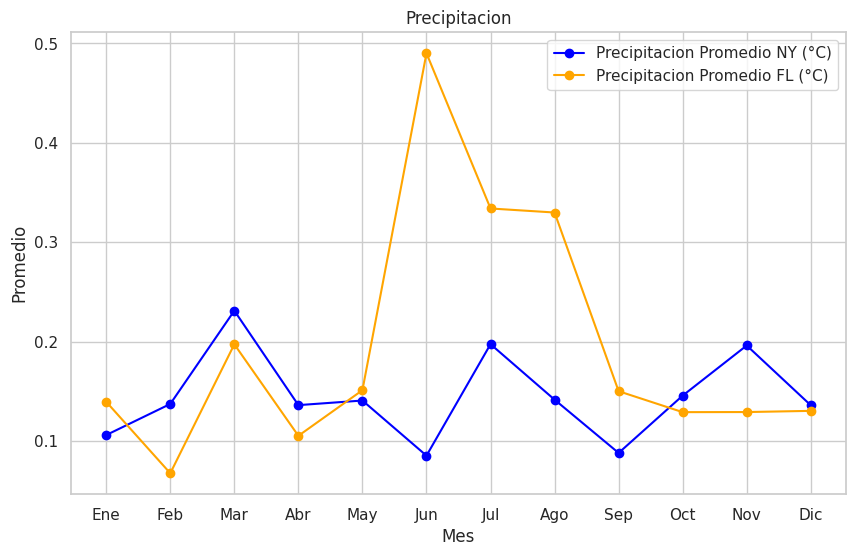

In [98]:
# Filtrar el DataFrame para quedarse solo con la temperatura, precipitaciones y velocidad del viento
data_by_month = combined_df.groupby('month')[['ny_precip','fl_precip']].mean()

# Configurar estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(data_by_month.index, data_by_month['ny_precip'], marker='o', color='blue', label='Precipitacion Promedio NY (°C)')
plt.plot(data_by_month.index, data_by_month['fl_precip'], marker='o', color='orange', label='Precipitacion Promedio FL (°C)')
plt.title('Precipitacion')
plt.xlabel('Mes')
plt.ylabel('Promedio')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend()
plt.show()

Y tambien Presenta mayores chances de precipitaciones!